## Problem: A non linear Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)

In [3]:
x.shape,y.shape

((200,), (200,))

In [4]:
#np.meshgrid Make N-D coordinate arrays for vectorized evaluations

X, Y = np.meshgrid(x, y)
c = np.ones((200,200))
e = np.random.rand(200,200)*0.1

Let us take a non-linear function - Hyperbolic Paraboloid

$$ Z = 2X^2 - 3Y^2  + 1 + \epsilon $$

In [5]:
Z = 2*X**2 - 3*Y**2 + 1*c + e

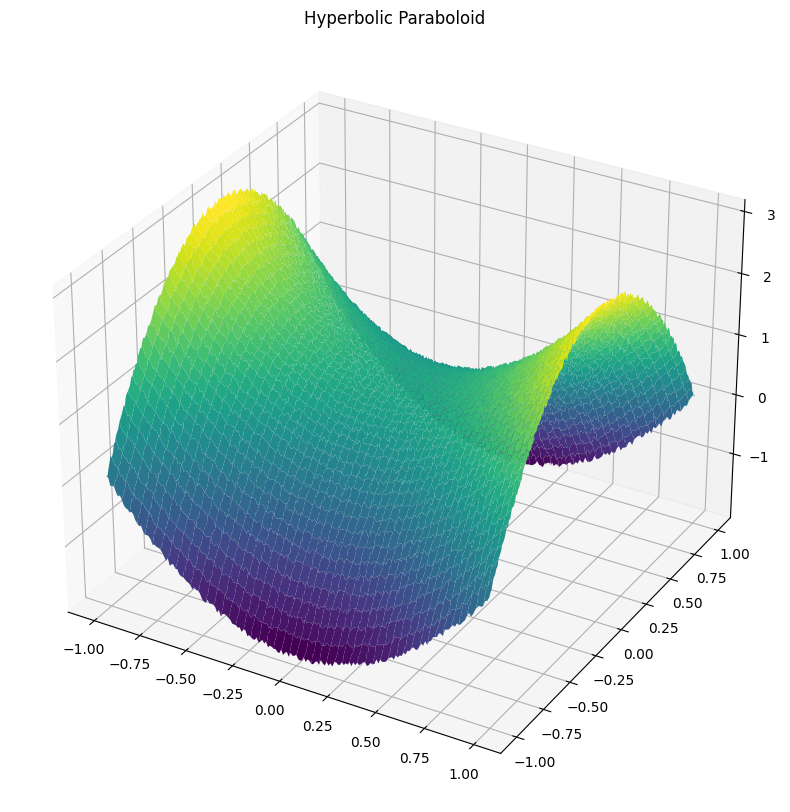

In [6]:
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis')
ax.set_title('Hyperbolic Paraboloid');

## Using Neural Network

### Step 0: Load the Keras Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Step 1: Create the input and output

In [8]:
#Translates slice objects to concatenation along the second axis.
input_xy = np.c_[X.reshape(-1,1),Y.reshape(-1,1)]
output_z = Z.reshape(-1,1)#column vextor

In [9]:
# Features + Target = same n rows
input_xy.shape,output_z.shape

((40000, 2), (40000, 1))

### Step 2: Create the Transformation & Prediction Model

In [10]:
model = Sequential()

model.add(Dense(64, input_dim=2,  activation="relu"))
model.add(Dense(32,  activation="relu"))

model.add(Dense(1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 3: Compile the Model - Loss, Optimizer and Fit the Model

In [12]:
from tensorflow.keras.optimizers import RMSprop
#model.compile(loss='mse', optimizer=RMSprop(learning_rate=0.00001), metrics=["mse"])
model.compile(loss='mse',
              optimizer=RMSprop(learning_rate=0.1),
              metrics=["mse"]
              )

### Step 4: Evaluate Model Performance

In [14]:
!pip install plot_keras_history -q

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


Epoch 1/12
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7737 - mse: 0.7737
Epoch 2/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1105 - mse: 0.1105
Epoch 3/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1078 - mse: 0.1078
Epoch 4/12
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1064 - mse: 0.1064
Epoch 5/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1076 - mse: 0.1076
Epoch 6/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1069 - mse: 0.1069
Epoch 7/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1082 - mse: 0.1082
Epoch 8/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1074 - mse: 0.1074
Epoch 9/12
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1088 - mse: 0.1088
Epoch 10/12
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1070 - mse: 0.1070
Epoch 11/12
1250/1250 [======

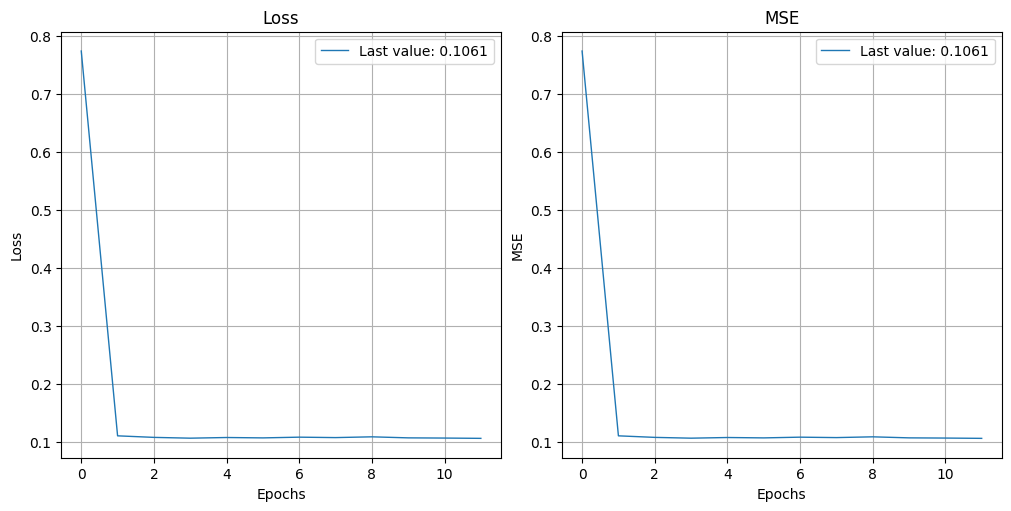

In [16]:
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

epochs =12
history = model.fit(input_xy,
                    output_z,
                    epochs=epochs,
                    shuffle=True,
                    verbose=1).history

plot_history(history);

### Step 5: Make Prediction from the model

In [19]:
Z_pred = model.predict(input_xy)
Z_pred = Z_pred.reshape(200,200)
Z_pred.shape

1250/1250 [==============================] - 2s 1ms/step


(200, 200)

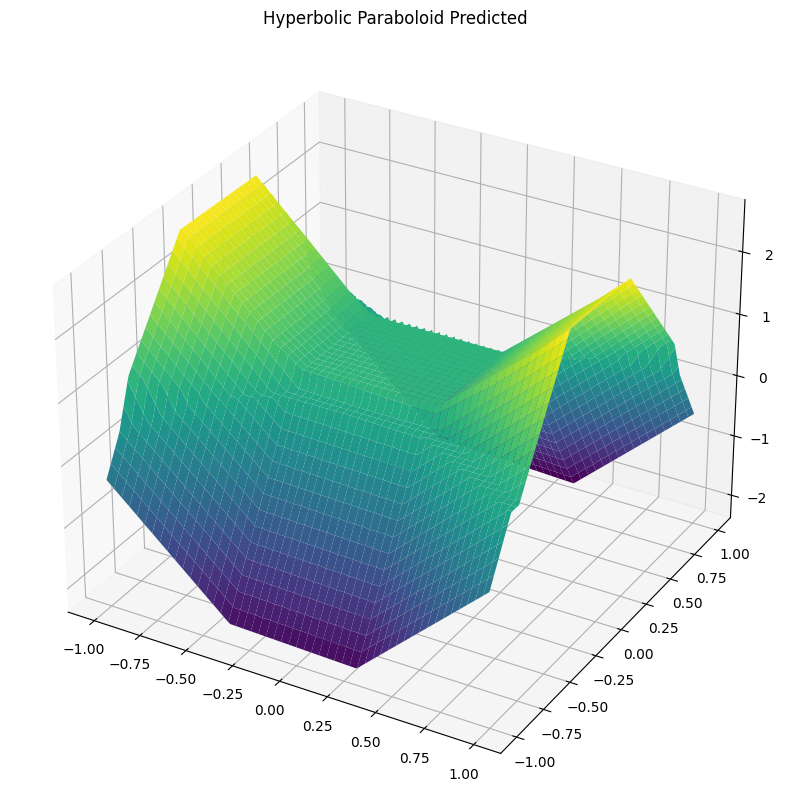

In [20]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z_pred,cmap='viridis')
ax.set_title('Hyperbolic Paraboloid Predicted');